In [1]:
import pandas as pd  
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing

In [29]:
df = pd.read_csv('WineQuality.data',header=None,encoding='utf-8')
df.columns=['fixed', 'volatile', 'citric', 'sugar', 'chlorides','dioxide','td','density','pH','sulphates','alcohol','quality']
X=df.drop(['quality'],axis=1)
X=preprocessing.scale(X)

# Kmean

In [5]:
start=time.time()
from sklearn.cluster import KMeans
clustering=KMeans(n_clusters=20, random_state=0).fit(X)
end=time.time()
ktime=end-start

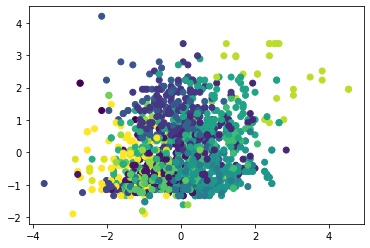

In [25]:
plt.scatter(X[:,8],X[:,10],c=clustering.labels_)

In [7]:
from sklearn import metrics as ms

In [8]:
k_avg=ms.silhouette_score(X,clustering.labels_)#silhouette_score
ktime

0.4105241298675537

# DBSCAN

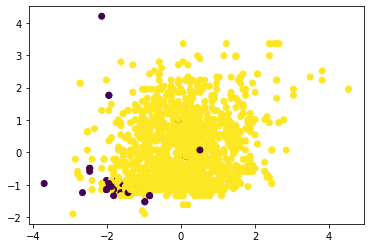

In [27]:
start=time.time()
from sklearn.cluster import DBSCAN
DBclustering=DBSCAN(eps=4,min_samples=50)
DBclustering.fit(X)
plt.scatter(X[:,8],X[:,10],c=DBclustering.labels_)
end=time.time()

In [10]:
DB_avg=ms.silhouette_score(X,DBclustering.labels_)#silhouette_score
DBtime=end-start

# hierarchal

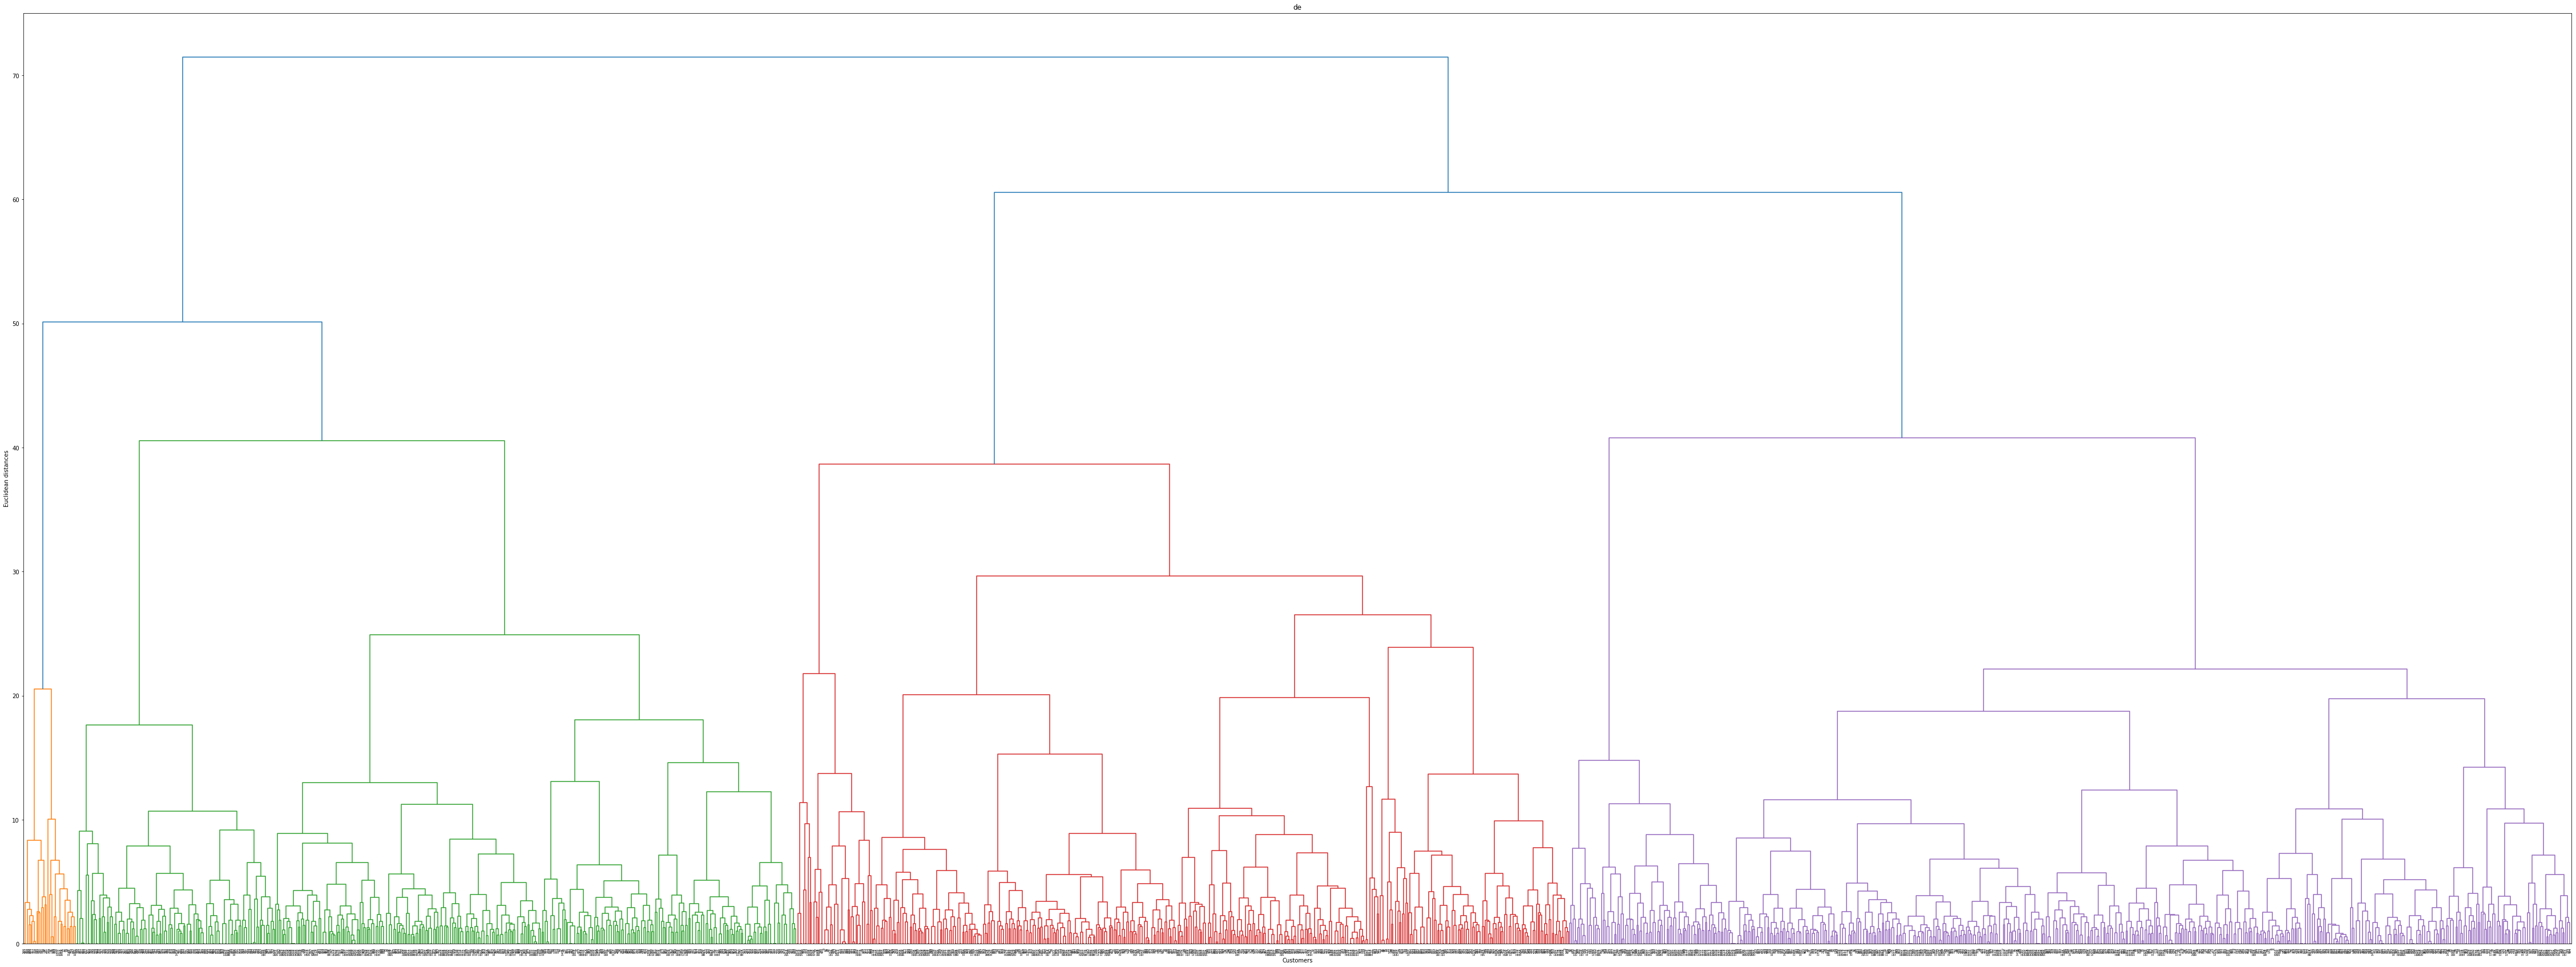

In [11]:
start=time.time()
from sklearn import cluster, datasets, metrics# Hierarchical Clustering 演算法
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 20)
hclust.fit(X)
cluster_labels = hclust.labels_
C2=X[0:2000]
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(80,30))
den = sch.dendrogram(sch.linkage(C2, method  = "ward"))
plt.title('de')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
end=time.time()

In [12]:
s_avg=ms.silhouette_score(X,cluster_labels)#silhouette_score
Htime=end-start

#compare

In [14]:
compare = pd.DataFrame()
compare['cluster']=['kmean','DBSCAN','hier']
compare['time']=[ktime,DBtime,Htime]
compare['score']=[k_avg,DB_avg,s_avg]
compare

,cluster,time,score
0,kmean,0.410524,0.154022
1,DBSCAN,0.172046,0.560825
2,hier,23.044073,0.119175
